<a href="https://colab.research.google.com/github/yh-kim05/shelter-prediction/blob/main/Project_2_yhk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ## **유기견 안락사 비율을 줄일 수는 없을까?**
---
### ✅ Section 1

*   Sprint 1 : EDA, Feature Engineering, Data manipulation, Data Visualization
*   Sprint 2 : Hypothesis Test, Confidence Interval, Bayesian
*   Sprint 3 : Dimension Reduction, PCA, Cluster


### ✅ Section 2

*  Sprint 1 : Linear Models (Simple regression, Multiple reg, Ridge reg, Logistic reg)
*  Sprint 2 : Tree Based Model (Decision Trees, Random Forests, Evaluation Metrics-mae,mse,rmse,r2 / auc-roc,f1, ?Model Selection?
*  Sprint 3 : Applied Predictive Modeling (Data wrangling, Feature importance, pdp, shap

---

<br/>

## **Data 선정**

1. 잃어버린 강아지와 버린 강아지를 알아낼 수 있을까?
   - 잃어버렸다고 생각되는 아이는 보호 기간을 늘리고 홍보를 더 넓게하면 주인에게 돌아갈 수 있지 않을까?
   - 버려졌다고 생각되는 아이는 입양 센터에 빠르게 홍보하면 새 주인을 맞이할 기회가 늘지 않을까?

2. 전체적인 EDA 및 시각화 프로세스
   - 전반적인 인사이트를 얻어보자

3. 흠.. 아직 모르겠당 생각해보자. 우선 시각화부터 해보자

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
## 데이터 불러오기

import pandas as pd

df_raw = pd.read_csv('/content/drive/MyDrive/Codestates/d2/유기동물보호현황.csv', encoding='cp949')


In [50]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10276 entries, 0 to 10275
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군명       10276 non-null  object 
 1   접수일자      10276 non-null  int64  
 2   발견장소      10276 non-null  object 
 3   상태        10276 non-null  object 
 4   공고고유번호    10276 non-null  object 
 5   공고시작일자    10276 non-null  int64  
 6   공고종료일자    10276 non-null  int64  
 7   품종        10276 non-null  object 
 8   색상        10276 non-null  object 
 9   나이        10276 non-null  object 
 10  체중        10276 non-null  object 
 11  성별        10276 non-null  object 
 12  중성화여부     10276 non-null  object 
 13  특징        10276 non-null  object 
 14  보호소명      10276 non-null  object 
 15  보호소전화번호   10276 non-null  object 
 16  보호소도로명주소  10276 non-null  object 
 17  보호소지번주소   10276 non-null  object 
 18  보호소우편번호   10276 non-null  int64  
 19  관할기관      10276 non-null  object 
 20  특이사항      18 non-null     ob

In [51]:
## duplicate check

df_raw['공고고유번호'].nunique()  ## 고유번호 값이 전체 데이터 수와 일치하므로 duplicate 없다.

10276

In [52]:
## 결측치가 '특이사항' 외에는 없다.
df_raw['특이사항'].unique()

array([nan, 'ketamine 1ml im', '눈물,콧물', '각막궤양, 안구내 염증', '기력없고 상태 매우 나쁨.',
       '짖음 매우 심함', '우측눈 각막 궤양', '주인분 사망', '유선종양', '빨강 하네스 착용,칩있으나 미등록',
       '콧물 눈병', '품종믹스', '사진속 공고번호 오류기입 01460->01461', '3주추정', '발작, 경열',
       '분홍색 목줄/개줄 착용'], dtype=object)

In [53]:
## 데이터 클리닝, 직관적인 부분 등 정리하는 스텝 첫 단계

def cleaning(df) :
    
    df = df_raw.drop(columns = ['공고고유번호', '보호소전화번호', '보호소도로명주소', '보호소지번주소', '특이사항', '이미지경로', '썸네일이미지경로'])

    ## 공고고유번호 : 각 공고마다 고유한 id 이므로 예측에 도움 X
    ## 보호소전화번호, 보호소도로명주소, 보호소지번주소 : 서로 같은 내용 + 보호소명과 중복 + 위도/경도와도 중복. 
    ##   (위도/경도가 좀 더 유의미한 결과값을 내지 않을까 싶어 위도/경도를 선택하였다.)
    ##   (보호소명은 예측 완료 후에 어딘지 알려면 있는게 낫지 않을까 싶어 남겨두었다.)
    ## 특이사항 : 크리티컬한 이슈가 될 수 있을 것으로 보이지만 데이터 수가 너무 적어서 제외.

    return df

In [54]:
df = cleaning(df_raw)

print(df.shape)

(10276, 18)


In [55]:
print(df['특징'].nunique())

df['특징'].head()

## 거진 제각각이다.. 사람에게는 중요 정보를 담고 있지만 예측 프로세스에는 도움이 될까 싶다.. 우선 보류하고, 나중에 coef 확인해서 feature engineering 결정하기.

6367


0                    사람 잘 따르며 순함
1                    보라색 목줄하고 있음
2    마이크로칩 확인됨. 순한편이지만 살짝 경계심 있음
3                         눈물자국심함
4               보호소에서출산, 모견 821번
Name: 특징, dtype: object

In [56]:
print(df.iloc[[297]]['특징'])   ## 특징이 null 값이 없는게 신기해서 확인해보니..

print(df.iloc[[297]]['특징'].isnull())  ## 빈칸인데 null 이 아니라고 뜬다...

df.iloc[[297]]['특징'] == ' '  ## 확인해보니 스페이스 한 칸이 들어가 있다.

## null 로 바꾸려고 했는데, 다시 생각해보니 굳이 null 을 만들 필요가 없다. 오히려 null 이면 '없음' 으로 바꾸겠지만, ' ' 에서 null로 할 필요도 '없음'으로 할 필요가 없어 보인다.
## 고로, 그대로 stay.

## 결측치 처리 완료!

297     
Name: 특징, dtype: object
297    False
Name: 특징, dtype: bool


297    True
Name: 특징, dtype: bool

In [57]:
print(df['상태'].nunique())   ## 타겟은 범주가 8 가지나 된다. 많다. 최대한 줄여보자.
df['상태'].unique()   ## Binary 를 선호한다지만 내가 알고 싶은 것을 확인하기에는 너무 좁다. 3가지로 줄여보았다.

## 종료 (saved) - 반환, 자연사, 기증, 입양, 방사, 기타   ## 반환과 입양도 따로 보고 싶었지만.. 나중에 해보기로!
## 종료 (안락사)
## 보호중 

8


array(['종료(반환)', '보호중', '종료(자연사)', '종료(안락사)', '종료(기증)', '종료(입양)',
       '종료(방사)', '종료(기타)'], dtype=object)

In [58]:
df[df['상태'] == '종료(안락사)'].head()   ## 혹시 구조시 아파서 안락사 한 경우인가 살펴보았는데, 딱히 그런 경우만을 분류한 것은 아닌 것으로 보인다... 맴찢 ㅠ^ㅠ

,시군명,접수일자,발견장소,상태,공고시작일자,공고종료일자,품종,색상,나이,체중,성별,중성화여부,특징,보호소명,보호소우편번호,관할기관,WGS84위도,WGS84경도
290,화성시,20220307,분천리 98-11,종료(안락사),20220307,20220316,[개] 믹스견,"검정,흰색,갈색",2018(년생),13(Kg),F,U,"붉은색목줄착용,하악골절 우측전지골절, 항생제와 진통 소염제투여,우측전지 깁스처치함",남양동물보호센터,18254,경기도 화성시,37.224949,126.843428
299,성남시,20220306,상대원1134,종료(안락사),20220306,20220316,[고양이] 한국 고양이,흑백,2014(년생),3(Kg),F,U,눈병 콧물 폐렴 매우 심하고 상태 매우 나쁨.,펫토피아동물병원,13601,경기도 성남시,37.367098,127.127688
696,포천시,20220225,신북면 삼성당리 617-1 인근,종료(안락사),20220226,20220308,[개] 믹스견,검/흰,2020(년생),12(Kg),F,U,양귀반접힘. 코검정. 부정교합. 발정. 겁많음/소심/방어적입질 약간. 꼬리단미안됨....,한국동물구조관리협회,11409,경기도 포천시,37.870117,126.983549
701,포천시,20220225,신북면 삼성당리 617-1 인근,종료(안락사),20220226,20220308,[개] 믹스견,흰/연갈,2019(년생),22(Kg),F,U,남색테두리 상아색 목걸이. 양귀쫑긋. 코갈색. 유선발달. 소심/얌전. 꼬리단미안됨....,한국동물구조관리협회,11409,경기도 포천시,37.870117,126.983549
702,김포시,20220225,감정동 24-1 인근,종료(안락사),20220226,20220308,[개] 믹스견,갈,2019(년생),9.9(Kg),M,Y,양귀쫑긋. 코갈색. 네발 오물오염. 소심/겁/천천히 다가가면 사람따름. 꼬리단미안됨...,한국동물구조관리협회,11409,경기도 김포시,37.870117,126.983549


In [59]:
print(df['품종'].nunique())
print(df[df['품종'].str.startswith('[기타축종]')]['품종'].unique(), '\n\n')
print(df[df['품종'].str.contains('기타축종')]['품종'].unique())

156
['[기타축종] ' '[기타축종] 꿩' '[기타축종] 병아리' '[기타축종] 토끼' '[기타축종] 페럿' '[기타축종] 닭'
 '[기타축종] 햄스터' '[기타축종] 염소' '[기타축종] 앵무새' '[기타축종] 기니피그' '[기타축종] 라쿤'
 '[기타축종] 그린틱코뉴어' '[기타축종] 거위' '[기타축종] 백한' '[기타축종] 금화조' '[기타축종] 타조'
 '[기타축종] 늑대거북' '[기타축종] 오리' '[기타축종] 금계' '[기타축종] 흑염소' '[기타축종] 면양'
 '[기타축종] 거북이(레이저백)' '[기타축종] 오골계' '[기타축종] 뱀' '[기타축종] 햅스터' '[기타축종] 사랑앵무'
 '[기타축종] 고슴도치' '[기타축종] 왕관앵무새' '[기타축종] 기타' '[기타축종] 메추리' '[기타축종] 백문조'
 '[기타축종] 자라' '[기타축종] 페랏' '[기타축종] 햄스터 ' '[기타축종] 거북이'] 


['[기타축종] ' '[기타축종] 꿩' '[기타축종] 병아리' '[기타축종] 토끼' '[기타축종] 페럿' '[기타축종] 닭'
 '[기타축종] 햄스터' '[기타축종] 염소' '[기타축종] 앵무새' '[기타축종] 기니피그' '[기타축종] 라쿤'
 '[기타축종] 그린틱코뉴어' '[기타축종] 거위' '[기타축종] 백한' '[기타축종] 금화조' '[기타축종] 타조'
 '[기타축종] 늑대거북' '[기타축종] 오리' '[기타축종] 금계' '[기타축종] 흑염소' '[기타축종] 면양'
 '[기타축종] 거북이(레이저백)' '[기타축종] 오골계' '[기타축종] 뱀' '[기타축종] 햅스터' '[기타축종] 사랑앵무'
 '[기타축종] 고슴도치' '[기타축종] 왕관앵무새' '[기타축종] 기타' '[기타축종] 메추리' '[기타축종] 백문조'
 '[기타축종] 자라' '[기타축종] 페랏' '[기타축종] 햄스터 ' '[기타축종] 거북이']


In [60]:
import numpy as np

In [61]:
def preprocessing(df):

    ## 타겟 범주 3개로 축소
    for i in ('반환', '자연사', '기증', '입양', '방사', '기타'):
        df.loc[df['상태'].str.contains(i), '상태'] = '종료(saved)'
        ## 종료(saved) - 반환, 자연사, 기증, 입양, 방사   ## 반환과 입양도 따로 보고 싶었지만.. 나중에 해보기로!
        ## 종료(안락사)
        ## 보호중 

    ## 품종 feature 안에서 기타축종 일괄 통일
    df.loc[df['품종'].str.contains('기타축종'), '품종'] = '[기타축종] '

    ## 체중 float 화 - (kg) 떼고 float 화 시키기
    df['체중'] = df['체중'].str.replace('(', '')
    df['체중'] = df['체중'].str.replace(')', '')
    df['체중'] = df['체중'].str.replace('Kg', '')
    df['체중'] = df['체중'].str.replace('\\', '')
    df['체중'] = df['체중'].str.replace(",", '.')
    df['체중'] = df['체중'].str.replace("'", '.')

    df['체중'] = df['체중'].str.replace('--', '0')
    df['체중'] = df['체중'].str.replace('미상', '0')   # 나중에 0 인 값들 조정 필요

    df.loc[df['체중'] == '22..00', '체중'] = '22'
    df.loc[df['체중'] == '28..00', '체중'] = '28'
    df.loc[df['체중'] == '2.8.', '체중'] = '2.8'
    df.loc[df['체중'] == '0.0.', '체중'] = '0'
    df.loc[df['체중'] == '0.40.', '체중'] = '0.4'

    df['체중'] = pd.to_numeric(df['체중']).astype(float).round(3)

    df.loc[df['체중'] == 0, '체중'] = np.nan   # 0 값 imputer 통해서 평균값으로 대체하기 위해 nan 으로 대체

    ## 나이 float 화 - (년생) 떼고 int 화 시키기
    df['나이'] = df['나이'].str.replace('(', '')
    df['나이'] = df['나이'].str.replace(')', '')

    df['나이'] = df['나이'].str.replace('년생', '')

    df['나이'] = pd.to_numeric(df['나이'])

    # 날짜 int to datetime   -> NO! object 로 두어야함
    #df['접수일자'] = pd.to_datetime(df['접수일자'], format = '%Y%m%d')
    #df['공고시작일자'] = pd.to_datetime(df['공고시작일자'], format = '%Y%m%d')
    #df['공고종료일자'] = pd.to_datetime(df['공고종료일자'], format = '%Y%m%d')


    return df

In [62]:
df_prep = preprocessing(df)

df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10276 entries, 0 to 10275
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시군명      10276 non-null  object 
 1   접수일자     10276 non-null  int64  
 2   발견장소     10276 non-null  object 
 3   상태       10276 non-null  object 
 4   공고시작일자   10276 non-null  int64  
 5   공고종료일자   10276 non-null  int64  
 6   품종       10276 non-null  object 
 7   색상       10276 non-null  object 
 8   나이       10276 non-null  int64  
 9   체중       10268 non-null  float64
 10  성별       10276 non-null  object 
 11  중성화여부    10276 non-null  object 
 12  특징       10276 non-null  object 
 13  보호소명     10276 non-null  object 
 14  보호소우편번호  10276 non-null  int64  
 15  관할기관     10276 non-null  object 
 16  WGS84위도  10276 non-null  float64
 17  WGS84경도  10276 non-null  float64
dtypes: float64(3), int64(5), object(10)
memory usage: 1.4+ MB


In [63]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

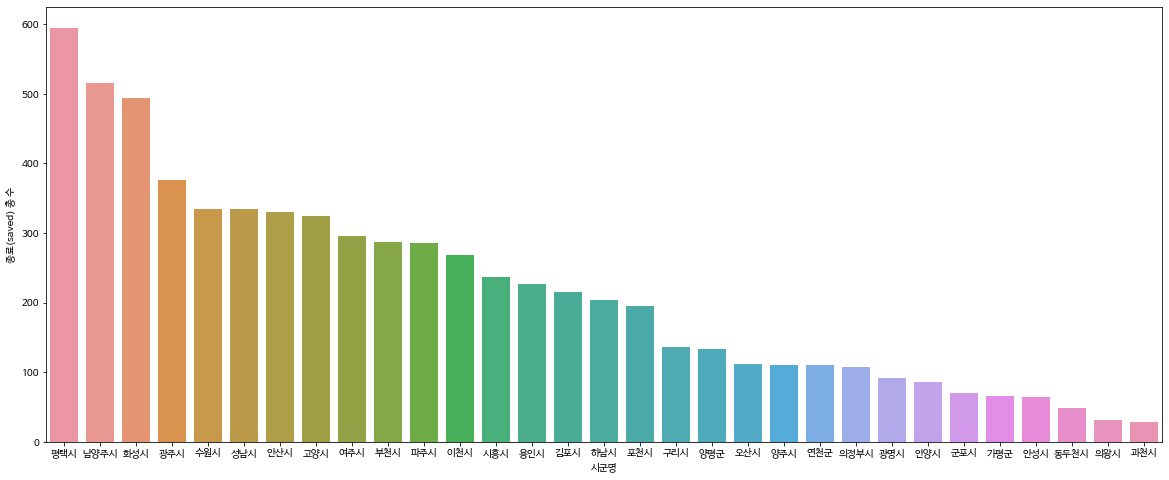

In [64]:
from matplotlib import pyplot as plt
import seaborn as sns

from matplotlib.pyplot import figure

plt.rc('font', family='NanumBarunGothic')

import warnings
warnings.filterwarnings("ignore")

groupcnt = df_prep.groupby(['상태', '시군명']).count().iloc[:,[0]]

gcnt = groupcnt.reset_index()
save = gcnt.loc[gcnt['상태'] == '종료(saved)'].sort_values(by = '접수일자', ascending = False)

plt.figure(figsize = (20, 8))
axs = sns.barplot(data = save, x = '시군명', y = '접수일자');
axs.set(ylabel = '종료(saved) 총 수');


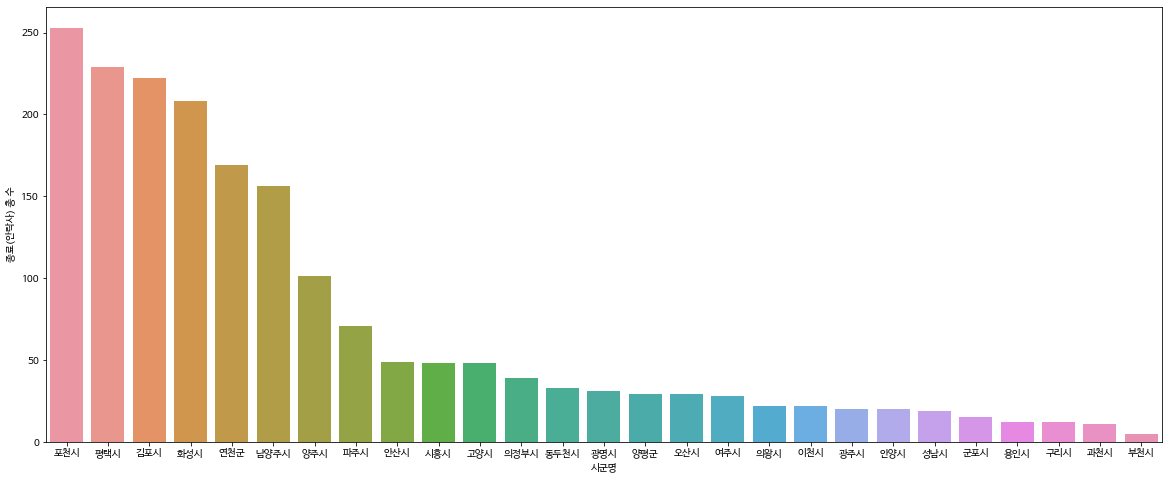

In [65]:
euth = gcnt.loc[gcnt['상태'] == '종료(안락사)'].sort_values(by = '접수일자', ascending = False)

plt.figure(figsize = (20, 8))
axe = sns.barplot(data = euth, x = '시군명', y = '접수일자');
axe.set(ylabel = '종료(안락사) 총 수');

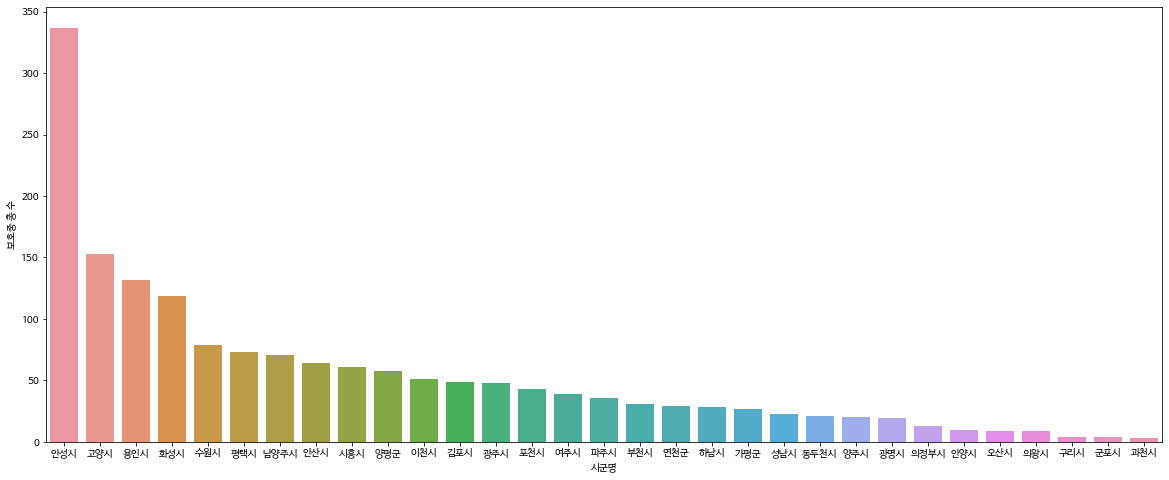

In [66]:
cont = gcnt.loc[gcnt['상태'] == '보호중'].sort_values(by = '접수일자', ascending = False)

plt.figure(figsize = (20, 8))
axc = sns.barplot(data = cont, x = '시군명', y = '접수일자');
axc.set(ylabel = '보호중 총 수');

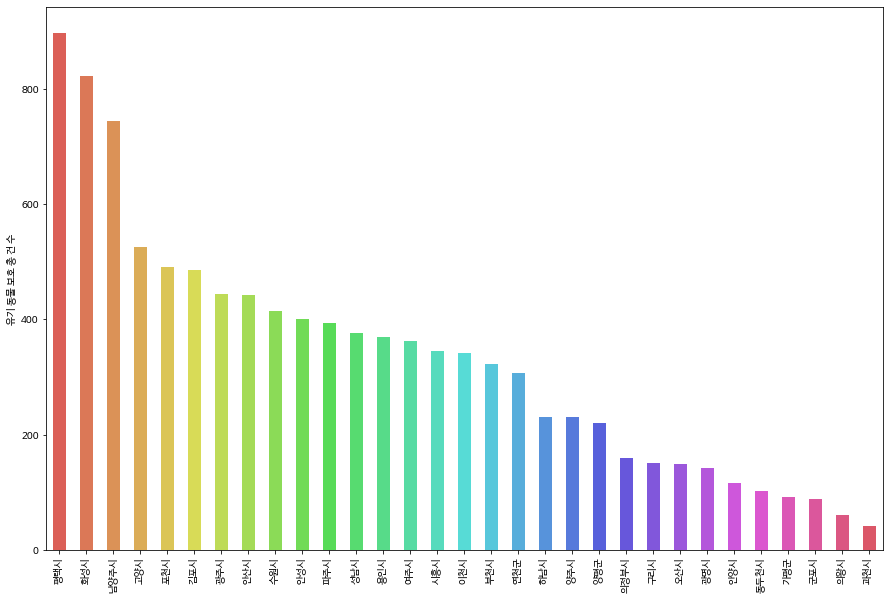

In [67]:
plt.figure(figsize = (15, 10))
colors = sns.color_palette('hls',df_prep['시군명'].nunique())
ax = df_prep['시군명'].value_counts().plot.bar(color = colors);

ax.set(ylabel = '유기 동물 보호 총 건 수');

plt.show()

In [68]:
from sklearn.model_selection import train_test_split

## 데이터를 train, validation, test set 으로 분리 (10276 개의 데이터 수로 인해 test 까지 분해 하지는 말까 했다가, validation 에 과적합을 피하기 위해 7:2:1 로 분리하였다.)

## train 과 test 로 9:1 비율로 분리

train_val, test = train_test_split(df_prep, train_size = 0.9, test_size = 0.1)

## 나머지에서 train 과 validation 으로 78:22 비율로 분리

train, val = train_test_split(train_val, train_size = 0.78, test_size = 0.22)

print(train.shape, val.shape, test.shape)

(7213, 18) (2035, 18) (1028, 18)


In [69]:
## 기본모델

test['상태'].value_counts()



종료(saved)    661
종료(안락사)      191
보호중          176
Name: 상태, dtype: int64

In [70]:
plt.rc('font', family='NanumBarunGothic')

## 각 데이터 타겟 분포

def analysis_on_target(df):
    n_saved_label, n_euthan_label, n_cont_label = -1, -1, -1

    target = '상태'

    n_saved_label = df[target].value_counts()[0]
    n_euthan_label = df[target].value_counts()[1]
    n_cont_label = df[target].value_counts()[2]

    plt.pie(
        (n_saved_label, n_euthan_label, n_cont_label),
        labels = ('종료(saved)', '종료(안락사)', '보호중'),
        startangle = 90,
        autopct = '%.2f%%')

    plt.title('Target : 상태', size = 15)
    plt.show();

    return n_saved_label, n_euthan_label, n_cont_label

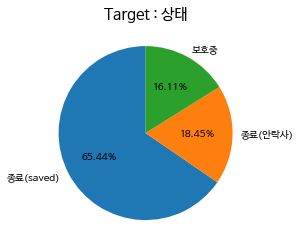

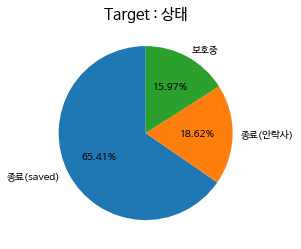

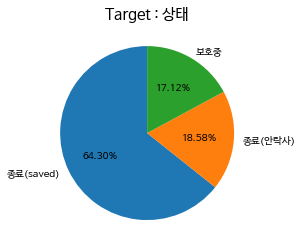

In [71]:
plt.rc('font', family='NanumBarunGothic')

train_label_count = analysis_on_target(train)
val_label_count = analysis_on_target(val)
test_label_count = analysis_on_target(test)

In [72]:
## Train / Val / Test data set을 features 를 담는 X 와 target 을 담는 y 로 각각 분리.

def divide_dataset(df):

    target = '상태'

    features = df.drop(columns = [target]).columns

    X = df[features]
    y = df[target]

    return X, y

X_train, y_train = divide_dataset(train)
X_val, y_val = divide_dataset(val)
X_test, y_test = divide_dataset(test)

In [73]:
print(X_train.shape, X_val.shape, X_test.shape)

(7213, 17) (2035, 17) (1028, 17)


In [74]:
!pip install category_encoders

In [75]:
import sklearn

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier

In [76]:
def fit_model(X_train, y_train):

    pipe = make_pipeline(
        OrdinalEncoder(),
        SimpleImputer(),
        XGBClassifier()
    )

    dists = {
        'simpleimputer__strategy' : ['mean', 'median', 'most_frequent'],
        'xgbclassifier__n_estimator' : range(1, 500),
        'xgbclassifier__max_depth' : range(5, 20),
        'xgbclassifier__learning_rate' : [0.1, 0.2, 0.3],
        'xgbclassifier__min_child_weight' : range(0, 30),       
    }

    clf = RandomizedSearchCV(
        pipe,
        param_distributions = dists,
        n_iter = 10,
        cv = 5,
        scoring = 'f1_micro',
        n_jobs = -1
    )

    clf.fit(X_train, y_train)

    return clf

In [77]:
def fit_forest(X_train, y_train):

    pipe = make_pipeline(
        OrdinalEncoder(),
        SimpleImputer(),
        RandomForestClassifier()
    )

    dists = {
        'simpleimputer__strategy' : ['mean', 'median', 'most_frequent'],
        'randomforestclassifier__oob_score' : [True, False],
        'randomforestclassifier__criterion' : ['entropy', 'gini'],
        'randomforestclassifier__max_depth' : range(1, 20),
        'randomforestclassifier__n_estimators' : range(1, 500),
        'randomforestclassifier__min_samples_leaf' : range(1, 30),
        'randomforestclassifier__class_weight' : ['balanced', None]       
    }

    clf = RandomizedSearchCV(
        pipe,
        param_distributions = dists,
        n_iter = 10,
        cv = 5,
        scoring = 'f1_micro',
        n_jobs = -1
    )

    clf.fit(X_train, y_train)

    return clf

In [78]:
clf = fit_model(X_train, y_train)
print("Best CV F1", clf.best_score_)
print("Best CV params", clf.best_params_)

Best CV F1 0.7759617186801653
Best CV params {'xgbclassifier__n_estimator': 482, 'xgbclassifier__min_child_weight': 17, 'xgbclassifier__max_depth': 12, 'xgbclassifier__learning_rate': 0.1, 'simpleimputer__strategy': 'median'}


In [79]:
y_val_pred = clf.best_estimator_.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average = 'micro')

print('Validation accuracy: ', val_accuracy)
print('Validation F1:', val_f1)

## micro, macro, weighted 중에서 micro 가 점수가 가장 높다.

Validation accuracy:  0.7872235872235872
Validation F1: 0.7872235872235872


In [80]:
y_test_pred = clf.best_estimator_.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average = 'micro')

print('Test accuracy: ', test_accuracy)
print('Test F1:', test_f1)

Test accuracy:  0.7850194552529183
Test F1: 0.7850194552529183


In [81]:
clff = fit_forest(X_train, y_train)
print("Best CV F1", clff.best_score_)
print("Best CV params", clff.best_params_)

Best CV F1 0.78220055113259
Best CV params {'simpleimputer__strategy': 'median', 'randomforestclassifier__oob_score': False, 'randomforestclassifier__n_estimators': 90, 'randomforestclassifier__min_samples_leaf': 7, 'randomforestclassifier__max_depth': 17, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__class_weight': None}


In [82]:
y_val_pred = clff.best_estimator_.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average = 'micro')

print('Validation accuracy: ', val_accuracy)
print('Validation F1:', val_f1)

Validation accuracy:  0.7842751842751843
Validation F1: 0.7842751842751843


In [83]:
y_test_pred = clff.best_estimator_.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average = 'micro')

print('Test accuracy: ', test_accuracy)
print('Test F1:', test_f1)

Test accuracy:  0.7723735408560312
Test F1: 0.7723735408560312


In [84]:
!pip install pdpbox

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7213 entries, 844 to 9796
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시군명      7213 non-null   object 
 1   접수일자     7213 non-null   int64  
 2   발견장소     7213 non-null   object 
 3   상태       7213 non-null   object 
 4   공고시작일자   7213 non-null   int64  
 5   공고종료일자   7213 non-null   int64  
 6   품종       7213 non-null   object 
 7   색상       7213 non-null   object 
 8   나이       7213 non-null   int64  
 9   체중       7208 non-null   float64
 10  성별       7213 non-null   object 
 11  중성화여부    7213 non-null   object 
 12  특징       7213 non-null   object 
 13  보호소명     7213 non-null   object 
 14  보호소우편번호  7213 non-null   int64  
 15  관할기관     7213 non-null   object 
 16  WGS84위도  7213 non-null   float64
 17  WGS84경도  7213 non-null   float64
dtypes: float64(3), int64(5), object(10)
memory usage: 1.0+ MB


In [86]:
train['상태'].unique()

array(['종료(안락사)', '종료(saved)', '보호중'], dtype=object)

In [87]:
## 체중 NAN 값 mean 또는 median 으로 채우기
#train['체중'] = train

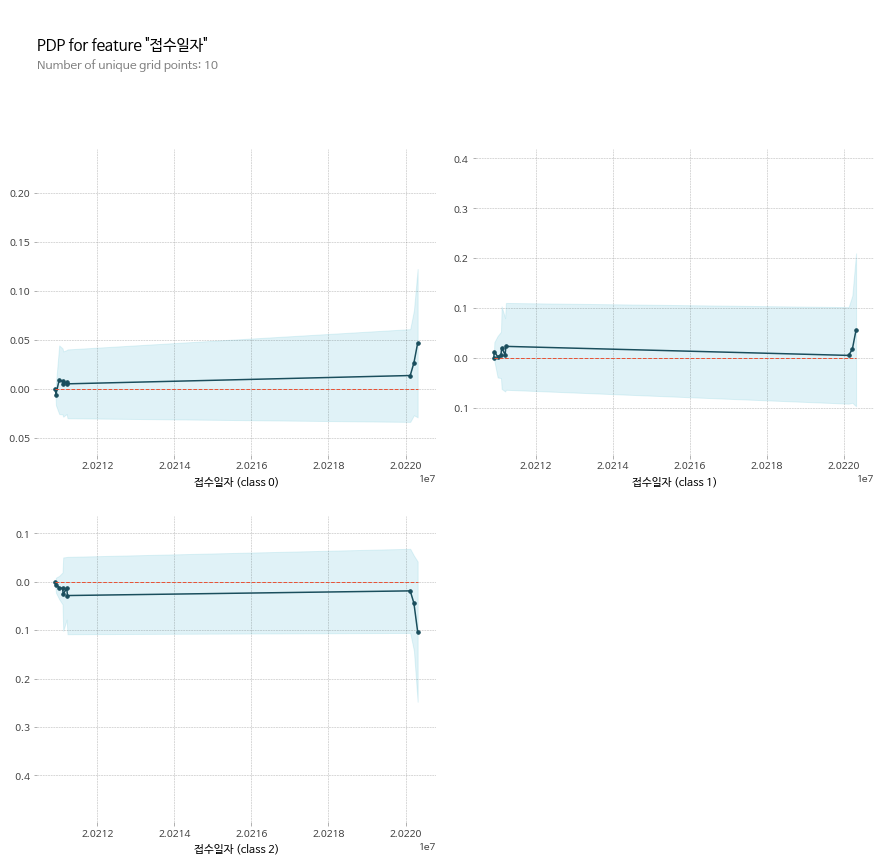

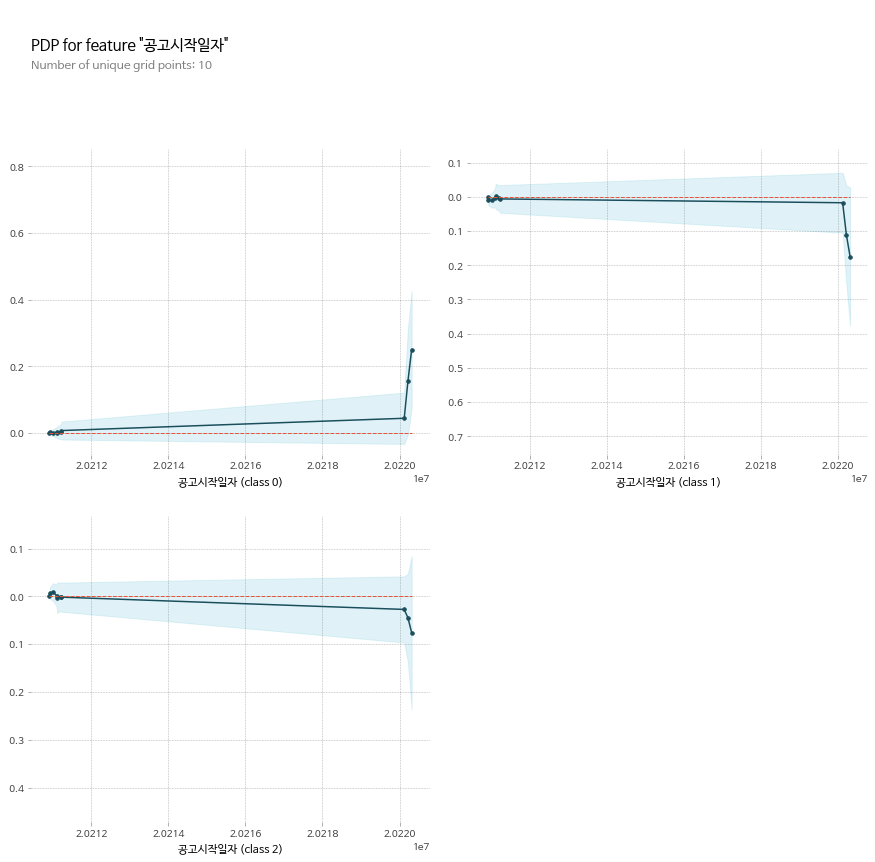

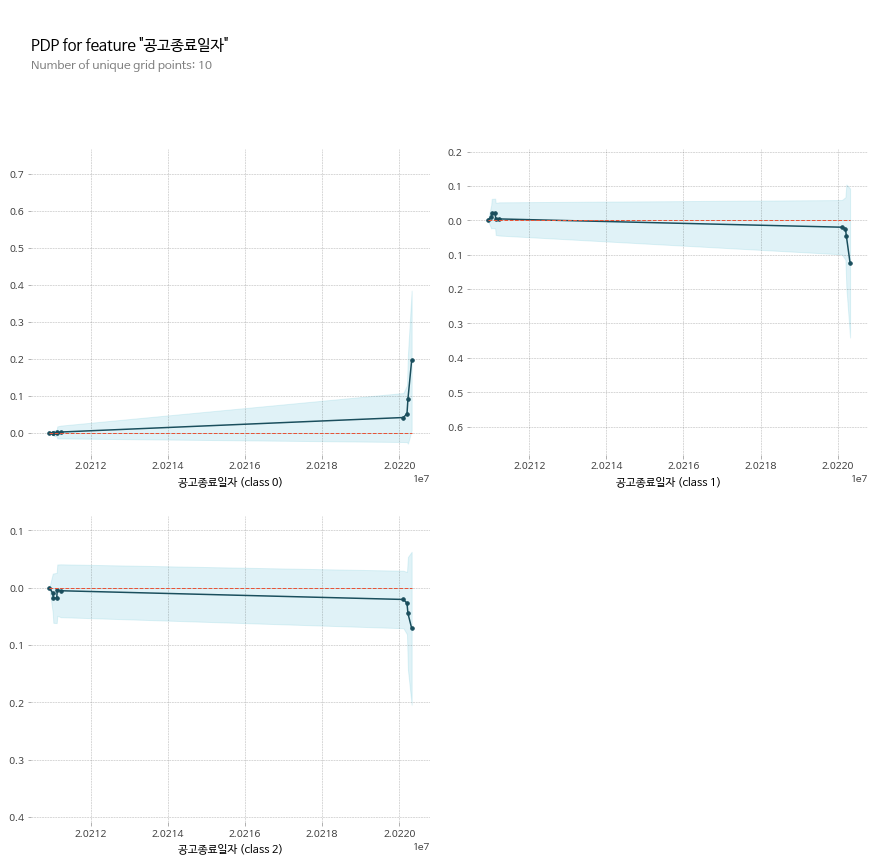

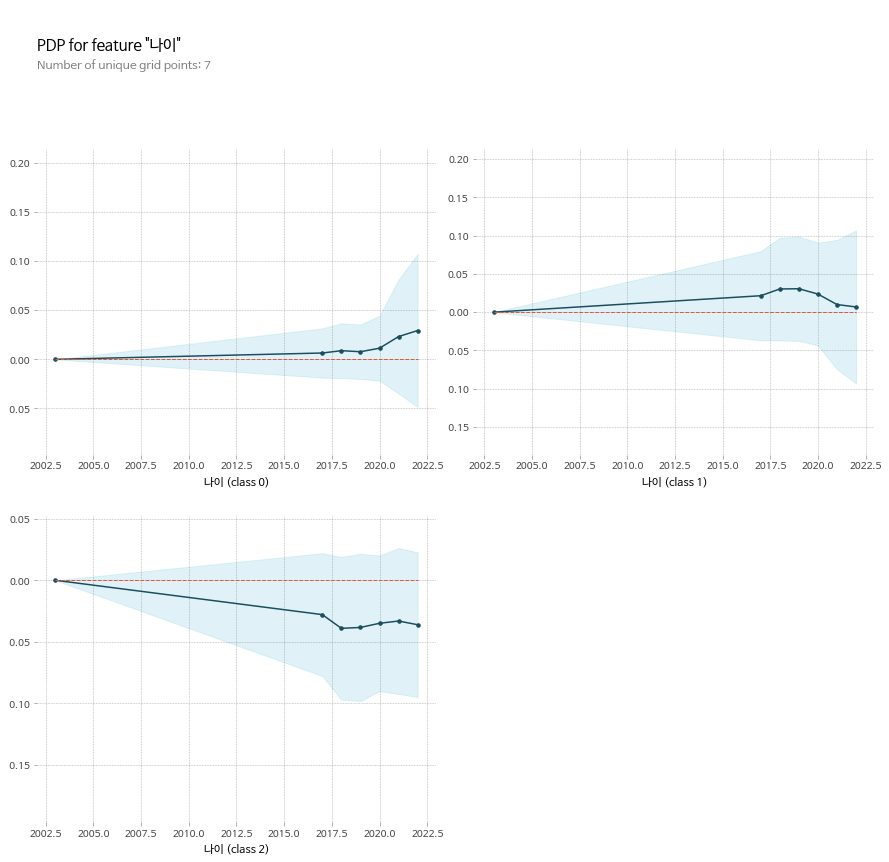

In [88]:
from pdpbox.pdp import pdp_isolate, pdp_plot

for i in ['접수일자', '공고시작일자', '공고종료일자', '나이']:

    feature = i

    isolated = pdp_isolate(
        model = clf.best_estimator_,
        dataset = X_train,
        model_features = X_train.columns,
        feature = feature,
        grid_type = 'percentile'
    )

    plot_params = {'font_family': 'NanumBarunGothic'}

    pdp_plot(isolated, feature_name = feature, plot_params = plot_params);

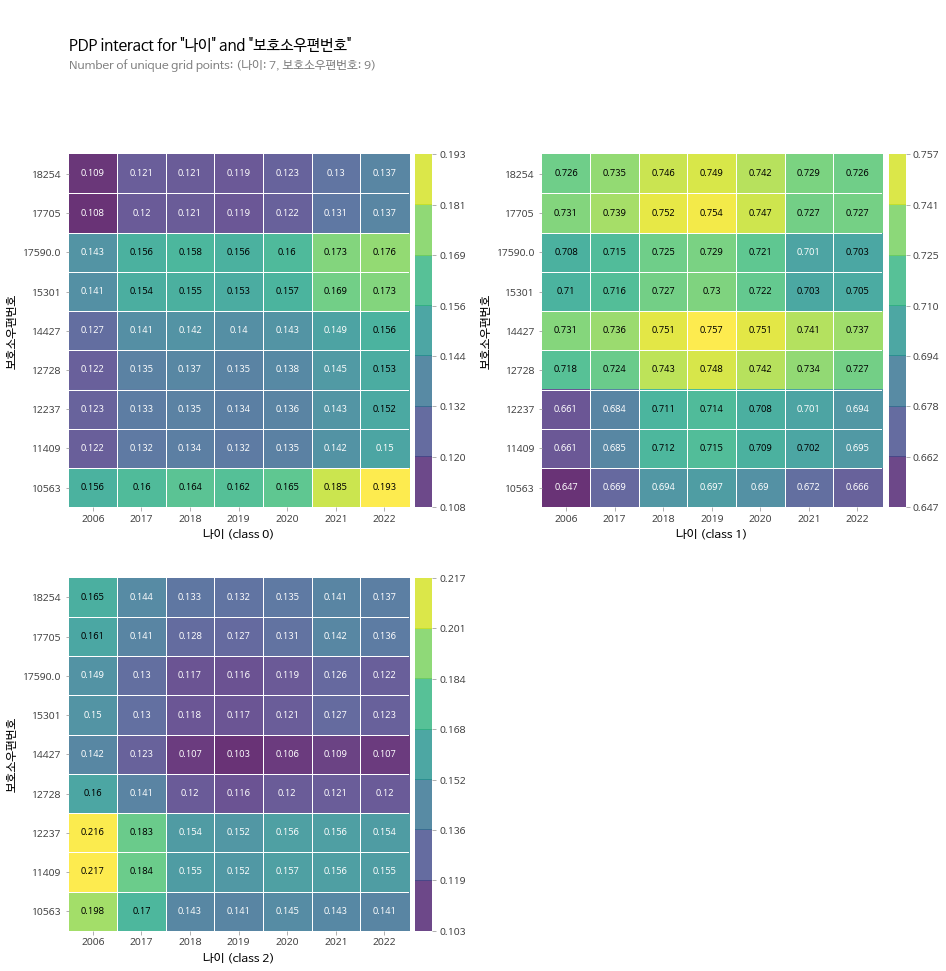

In [89]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['나이', '보호소우편번호']

interaction = pdp_interact(
    model=clf.best_estimator_, 
    dataset=X_val,
    model_features=X_val.columns, 
    features=features
)

plot_params = {'font_family' : 'NanumBarunGothic'}

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features, plot_params = plot_params);

In [90]:
#feat_importance = pd.DataFrame({'Feature':train.columns[:-1],'Importance':clf.best_estimator_.feature_importances_.tolist()})

#plt.subplots(figsize=(8, 6))
#g = sns.barplot(data=feat_importance, x='Feature', y='Importance')
#labels = g.get_xticklabels()
#g.set_xticklabels(labels,rotation=50)
#plt.show(g)

In [91]:
!pip install shap

In [92]:
import shap

#model = xgboost.XGBRegressor().fit(X_train, y_train)
#explainer = shap.TreeExplainer(model)

#shap_values = explainer.shap_values(X_train)

#shap.initjs(),
#shap.force_plot(
#    base_value = explainer.expected_value,
#    shap_values = shap_values,
#    features = X_train
#)

## shap 은 int, float, bool 값에 대해서만 그릴 수 있다. 내 데이터는 거의 object type 이라 그려질 것이 별로 없어 유의미하지 않을 것 같다.
## 특징들을 nlp 를 해야할 데이터인데, 점점 데이터를 잘 못 골랐나 싶다..